# Dashboard of Renewable Energy in the U.S

In [1]:
import pandas as pd
import numpy as np
import folium
import os
from branca.utilities import split_six
state_geo = os.path.join('data', 'us-states.json')
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display

## Import Data 

* Data Source: https://catalog.data.gov/dataset/united-states-renewable-energy-technical-potential
* Reference: https://openei.org/doe-opendata/dataset/5346c5c2-be26-4be7-9663-b5a98cbb7527/resource/01fe78a8-77b6-4c59-bc36-cae177ee86c3/download/usretechpotential.pdf
* Goal: Create dashboard to visualize the data of renewable energy technical potential in the US.


In [2]:
inputDF = pd.read_csv('usretechnicalpotential.csv')

In [3]:
inputDF = inputDF.rename(columns = {'Unnamed: 0':'state'})
# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

In [4]:
inputDF.head()

state  urbanUtilityScalePV_GWh  urbanUtilityScalePV_GW  \
0     Alabama                    35850                      20   
1      Alaska                      166                       0   
2     Arizona                   121305                      52   
3    Arkansas                    28960                      15   
4  California                   246008                     111   

   urbanUtilityScalePV_km2  ruralUtilityScalePV_GWh  ruralUtilityScalePV_GW  \
0                      426                  3706838                    2114   
1                        2                  8282976                    9005   
2                     1096                 11867693                    5147   
3                      332                  4986388                    2747   
4                     2320                  8855917                    4010   

   ruralUtilityScalePV_km2  rooftopPV_GWh  rooftopPV_GW   CSP_GWh  \
0                    44058        15475.0            12         0   
1                   187608            0.0             1         0   
2                   107230        22736.0            14  12544333   
3                    57239         8484.0             6         0   
4                    83549       106411.0            75   8490916   

            ...             biopowerGaseous_GWh  biopowerGaseous_GW  \
0           ...                            1533                   0   
1           ...                              61                   0   
2           ...                             837                   0   
3           ...                            1063                   0   
4           ...                           15510                   1   

   biopowerGaseous_Tonnes-CH4  geothermalHydrothermal_GWh  \
0                      326186                           0   
1                       13156                       15437   
2                      178188                        8329   
3                      226178                           0   
4                     3300211                      130921   

   geothermalHydrothermal_GW  EGSGeothermal_GWh  EGSGeothermal_GW  \
0                          0           535489.0              67.0   
1                          1                0.0               0.0   
2                          1          1239147.0             157.0   
3                          0           628621.0              79.0   
4                         16          1344179.0             170.0   

   hydropower_GWh  hydropower_GW  hydropower_countOfSites  
0            4102              0                     2435  
1           23675              5                     3053  
2            1303              0                     1958  
3            6093              1                     3268  
4           30023              6                     9692  

[5 rows x 31 columns]

In [5]:
inputDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 31 columns):
state                         51 non-null object
urbanUtilityScalePV_GWh       51 non-null int64
urbanUtilityScalePV_GW        51 non-null int64
urbanUtilityScalePV_km2       51 non-null int64
ruralUtilityScalePV_GWh       51 non-null int64
ruralUtilityScalePV_GW        51 non-null int64
ruralUtilityScalePV_km2       51 non-null int64
rooftopPV_GWh                 51 non-null float64
rooftopPV_GW                  51 non-null int64
CSP_GWh                       51 non-null int64
CSP_GW                        51 non-null int64
CSP_km2                       51 non-null int64
onshoreWind_GWh               51 non-null int64
onshoreWind_GW                51 non-null int64
onshoreWind_km2               51 non-null int64
offshoreWind_GWh              51 non-null float64
offshoreWind_GW               51 non-null float64
offshoreWind_km2              51 non-null float64
biopowerSolid_GWh       

##  Organize data

### 1. Utility-Scale Photovoltaics (Urban) 
* Definition: large-scale photovoltaics(PV) deployed within urban boundaries on urban open space. 
* State technical potential generation is expressed as: 
$$ StateMWh = State \Sigma[UrbanOpenSapce(km^2)*PowerDensity(48 \frac{MW}{km^2})* StateCapacityFactor(\%)* 8760(HoursPerYear)] $$


In [6]:
urbanUtilityScalePV_DF = inputDF[['state','urbanUtilityScalePV_GWh','urbanUtilityScalePV_GW','urbanUtilityScalePV_km2']]
urbanUtilityScalePV_sumDF = pd.DataFrame([['U.S Total',\
                                           urbanUtilityScalePV_DF['urbanUtilityScalePV_GWh'].sum(),\
                                           urbanUtilityScalePV_DF['urbanUtilityScalePV_GW'].sum(),\
                                           urbanUtilityScalePV_DF['urbanUtilityScalePV_km2'].sum()]], \
                                         columns=['state','urbanUtilityScalePV_GWh','urbanUtilityScalePV_GW','urbanUtilityScalePV_km2'])

#### The total estimated annual technical potential in the United States for urban utility-scale PV：

In [7]:
urbanUtilityScalePV_sumDF

state  urbanUtilityScalePV_GWh  urbanUtilityScalePV_GW  \
0  U.S Total                  2231670                    1195   

   urbanUtilityScalePV_km2  
0                    25343

#### Choropleth map of estimated technical potential for urban utility-scale photovoltaics in the U.S.:

In [8]:
threshold_scale = split_six(urbanUtilityScalePV_DF['urbanUtilityScalePV_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=urbanUtilityScalePV_DF,
    columns=['state', 'urbanUtilityScalePV_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Urban Utility Scale PV (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)

m.save(os.path.join('choroplethMap', 'urbanUtilityScalePV.html'))

m

#### Note: GitHub preview cannot load the choropleth map directly, so I saved the map in html and screenshot the result for better visualizationon on GitHub preview.

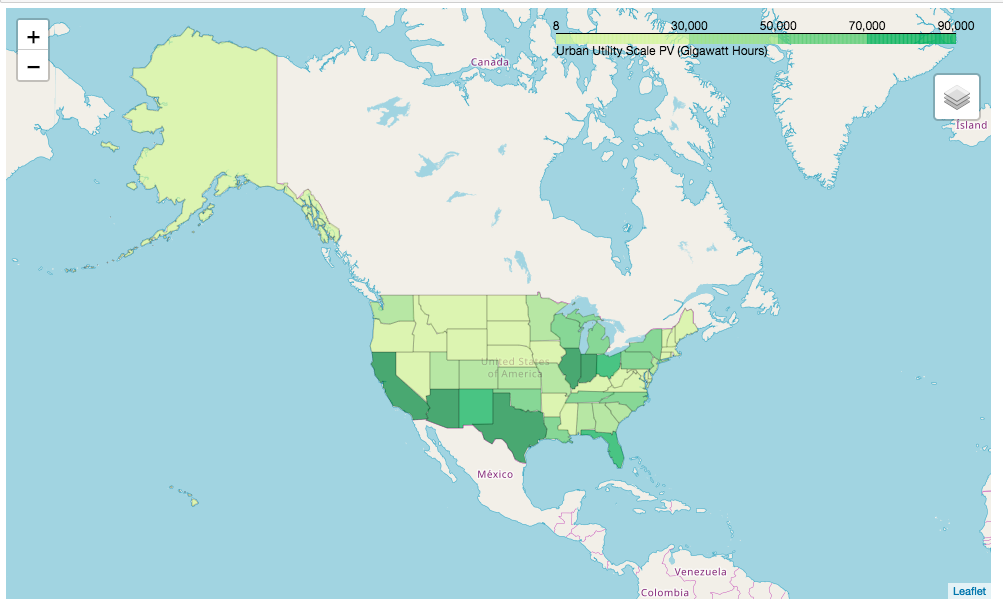

In [9]:
display(Image("choroplethMap/urbanUtilityScalePV.png", width=1000))

#### Table of estimated technical potential for urban utility-scale photovoltaics by state:
 Texas and California have the highest estimated
technical potential, a result of a combination of good solar resource and large population

In [10]:
urbanUtilityScalePV_DF.append(urbanUtilityScalePV_sumDF)

state  urbanUtilityScalePV_GWh  urbanUtilityScalePV_GW  \
0                Alabama                    35850                      20   
1                 Alaska                      166                       0   
2                Arizona                   121305                      52   
3               Arkansas                    28960                      15   
4             California                   246008                     111   
5               Colorado                    43470                      19   
6            Connecticut                     7716                       4   
7               Delaware                    14856                       9   
8   District of Columbia                        8                       0   
9                Florida                    72787                      39   
10               Georgia                    43166                      24   
11                Hawaii                     3725                       1   
12                 Idaho                    23194                      12   
13              Illinois                   103551                      63   
14               Indiana                    98815                      61   
15                  Iowa                    27091                      15   
16                Kansas                    31705                      15   
17              Kentucky                    26514                      16   
18             Louisiana                    55669                      32   
19                 Maine                     3216                       1   
20              Maryland                    28551                      18   
21         Massachusetts                    17469                      10   
22              Michigan                    50845                      33   
23             Minnesota                    33370                      20   
24           Mississippi                    26366                      15   
25              Missouri                    30549                      18   
26               Montana                    11370                       6   
27              Nebraska                    12954                       6   
28                Nevada                    24893                      10   
29         New Hampshire                     3790                       2   
30            New Jersey                    44307                      25   
31            New Mexico                    71356                      30   
32              New York                    52803                      32   
33        North Carolina                    68346                      37   
34          North Dakota                     4871                       2   
35                  Ohio                    86495                      57   
36              Oklahoma                    50040                      25   
37                Oregon                    25783                      12   
38          Pennsylvania                    56161                      36   
39          Rhode Island                     1787                       1   
40        South Carolina                    33834                      19   
41          South Dakota                     4573                       2   
42             Tennessee                    50243                      28   
43                 Texas                   294684                     154   
44                  Utah                    30492                      14   
45               Vermont                     1632                       1   
46              Virginia                    27451                      15   
47            Washington                    33690                      19   
48         West Virginia                     3023                       2   
49             Wisconsin                    54938                      34   
50               Wyoming                     7232                       3   
0              

### 2. Utility-Scale Photovoltaics  (Rural) 
* Definition:  large-scale PV deployed outside urban boundaries (the complement of urban utility-scale PV).
* State technical potential generation is expressed as: 
$$ StateMWh = State \Sigma[AvailableLand(km^2)*PowerDensity(48 \frac{MW}{km^2})* StateCapacityFactor(\%)* 8760(HoursPerYear)] $$

In [11]:
ruralUtilityScalePV_DF = inputDF[['state','ruralUtilityScalePV_GWh','ruralUtilityScalePV_GW','ruralUtilityScalePV_km2']]
ruralUtilityScalePV_sumDF = pd.DataFrame([['U.S Total',\
                                           ruralUtilityScalePV_DF['ruralUtilityScalePV_GWh'].sum(),\
                                           ruralUtilityScalePV_DF['ruralUtilityScalePV_GW'].sum(),\
                                           ruralUtilityScalePV_DF['ruralUtilityScalePV_km2'].sum()]], \
                                         columns=['state','ruralUtilityScalePV_GWh','ruralUtilityScalePV_GW','ruralUtilityScalePV_km2'])

#### The total estimated annual technical potential in the United States for rural utility-scale PV：

In [12]:
ruralUtilityScalePV_sumDF

state  ruralUtilityScalePV_GWh  ruralUtilityScalePV_GW  \
0  U.S Total                280613190                  152950   

   ruralUtilityScalePV_km2  
0                  3186931

#### Choropleth map of estimated technical potential for rural utility-scale photovoltaics in the U.S.:

In [13]:
threshold_scale = split_six(ruralUtilityScalePV_DF['ruralUtilityScalePV_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=ruralUtilityScalePV_DF,
    columns=['state', 'ruralUtilityScalePV_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rural Utility Scale PV (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'ruralUtilityScalePV.html'))

m

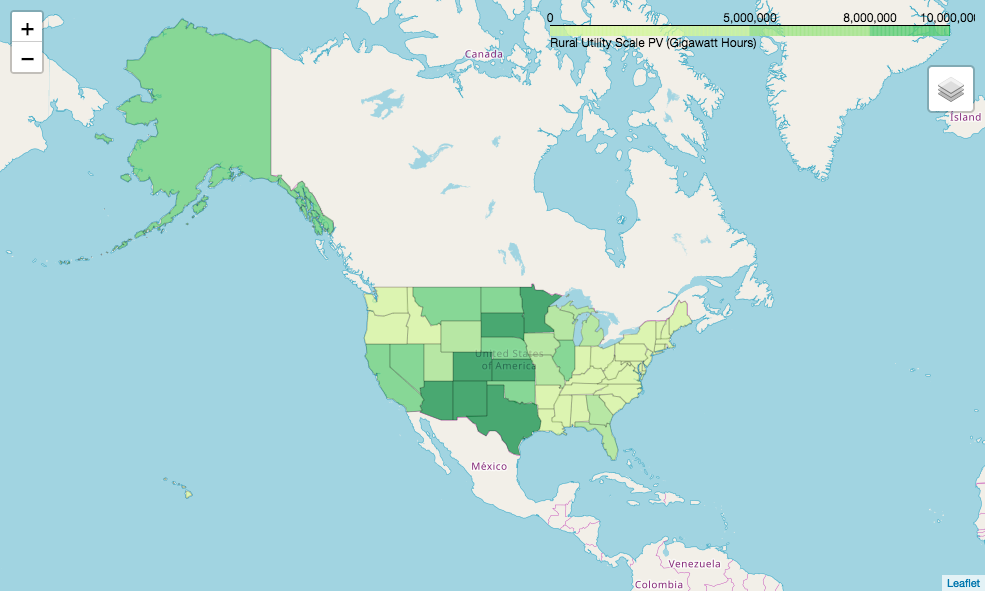

In [14]:
display(Image("choroplethMap/ruralUtilityScalePV.png", width=1000))

#### Table of estimated technical potential for rural utility-scale photovoltaics by state:

In [15]:
ruralUtilityScalePV_DF.append(ruralUtilityScalePV_sumDF)

state  ruralUtilityScalePV_GWh  ruralUtilityScalePV_GW  \
0                Alabama                  3706838                    2114   
1                 Alaska                  8282976                    9005   
2                Arizona                 11867693                    5147   
3               Arkansas                  4986388                    2747   
4             California                  8855917                    4010   
5               Colorado                 10238083                    4514   
6            Connecticut                    19627                      12   
7               Delaware                   272332                     167   
8   District of Columbia                        0                       0   
9                Florida                  5137346                    2812   
10               Georgia                  5492183                    3088   
11                Hawaii                    38032                      20   
12                 Idaho                  3936847                    2045   
13              Illinois                  8090985                    4969   
14               Indiana                  4876185                    3018   
15                  Iowa                  6994159                    4020   
16                Kansas                 14500149                    6959   
17              Kentucky                  1823976                    1119   
18             Louisiana                  4114605                    2394   
19                 Maine                  1100327                     658   
20              Maryland                   585949                     373   
21         Massachusetts                    82204                      51   
22              Michigan                  5215639                    3443   
23             Minnesota                 10792814                    6510   
24           Mississippi                  4981252                    2879   
25              Missouri                  5335268                    3156   
26               Montana                  8187341                    4402   
27              Nebraska                  9266756                    4869   
28                Nevada                  8614454                    3732   
29         New Hampshire                    57363                      35   
30            New Jersey                   439773                     251   
31            New Mexico                 16318543                    7087   
32              New York                  1492566                     926   
33        North Carolina                  4232789                    2346   
34          North Dakota                  9734447                    5482   
35                  Ohio                  3626181                    2395   
36              Oklahoma                  9341920                    4782   
37                Oregon                  3740478                    1884   
38          Pennsylvania                   553356                     356   
39          Rhode Island                    13636                       8   
40        South Carolina                  2754973                    1555   
41          South Dakota                 10008873                    5344   
42             Tennessee                  2225989                    1266   
43                 Texas                 38993581                   20411   
44                  Utah                  5184878                    2390   
45               Vermont                    54727                      35   
46              Virginia                  1882467                    1074   
47            Washington                  1738150                     996   
48         West Virginia                    52693                      35   
49             Wisconsin                  5042258                    3205   
50               Wyoming                  5727224                    2854   
0              

### 3. Rooftop Photovoltaics 
* Definition:  We obtained rooftop PV estimates from Denholm and Margolis (2008b), who obtained floor space estimates for commercial and residential buildings from McGraw-Hill and scaled these to estimate a building footprint based on the number of floors. 


In [16]:
rooftopPV_DF = inputDF[['state','rooftopPV_GWh','rooftopPV_GW']]
rooftopPV_sumDF = pd.DataFrame([['U.S Total',\
                                           rooftopPV_DF['rooftopPV_GWh'].sum(),\
                                           rooftopPV_DF['rooftopPV_GW'].sum()]],\
                                         columns=['state','rooftopPV_GWh','rooftopPV_GW'])

#### The total estimated annual technical potential in the United States for Rooftop Photovoltaics ：

In [17]:
rooftopPV_sumDF

state  rooftopPV_GWh  rooftopPV_GW
0  U.S Total       818711.0           639

#### Choropleth map of estimated technical potential for rooftop photovoltaics in the U.S.:

In [18]:
threshold_scale = split_six(rooftopPV_DF['rooftopPV_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=rooftopPV_DF,
    columns=['state', 'rooftopPV_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rooftop PV (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'rooftopPV.html'))

m

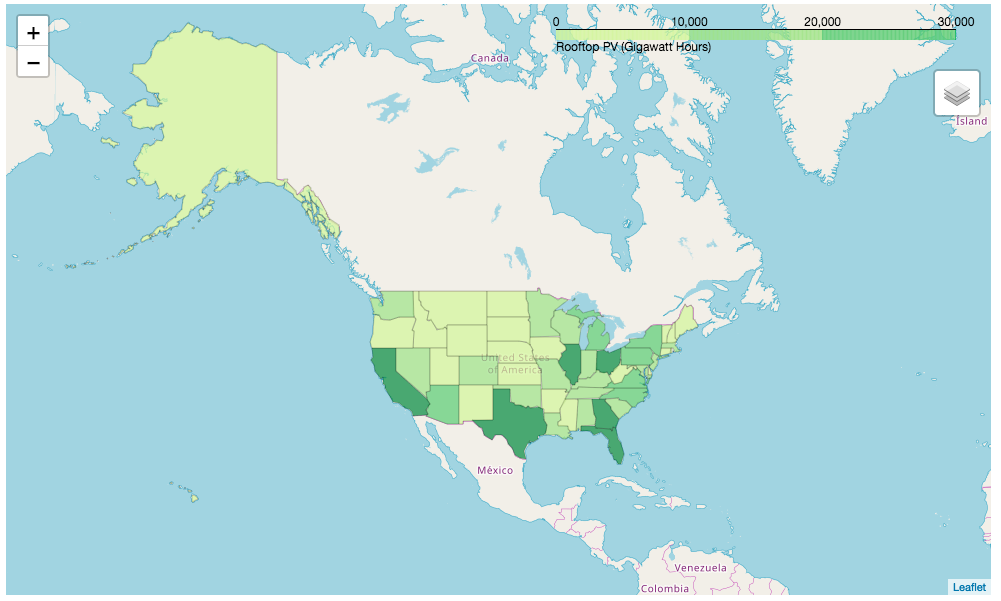

In [19]:
display(Image("choroplethMap/rooftopPV.png", width=1000))

#### Table of estimated technical potential for rooftop photovoltaics by state:
States with the largest technical potential typically have the largest populations. California has the highest technical potential of 106 TWh due to its mix of high population and relatively good solar resource.

In [20]:
rooftopPV_DF.append(rooftopPV_sumDF)

state  rooftopPV_GWh  rooftopPV_GW
0                Alabama        15475.0            12
1                 Alaska            0.0             1
2                Arizona        22736.0            14
3               Arkansas         8484.0             6
4             California       106411.0            75
5               Colorado        16162.0            11
6            Connecticut         6616.0             5
7               Delaware         2185.0             1
8   District of Columbia         2490.0             2
9                Florida        63986.0            49
10               Georgia        31116.0            24
11                Hawaii            0.0             2
12                 Idaho         4051.0             3
13              Illinois        30086.0            26
14               Indiana        17151.0            14
15                  Iowa         8646.0             7
16                Kansas         8962.0             6
17              Kentucky        12312.0            10
18             Louisiana        14368.0            11
19                 Maine         2443.0             2
20              Maryland        14849.0            12
21         Massachusetts        11722.0            10
22              Michigan        23527.0            21
23             Minnesota        14321.0            12
24           Mississippi         8614.0             6
25              Missouri        16159.0            13
26               Montana         2194.0             1
27              Nebraska         5336.0             4
28                Nevada        10767.0             7
29         New Hampshire         2298.0             2
30            New Jersey        15767.0            13
31            New Mexico         6513.0             4
32              New York        28779.0            25
33        North Carolina        28419.0            23
34          North Dakota         1916.0             1
35                  Ohio        30064.0            27
36              Oklahoma        12442.0             9
37                Oregon         8322.0             7
38          Pennsylvania        22215.0            19
39          Rhode Island         1710.0             1
40        South Carolina        14412.0            11
41          South Dakota         2082.0             1
42             Tennessee        19685.0            16
43                 Texas        78716.0            60
44                  Utah         7513.0             5
45               Vermont         1115.0             1
46              Virginia        22266.0            18
47            Washington        13599.0            13
48         West Virginia         4220.0             3
49             Wisconsin        13939.0            12
50               Wyoming         1550.0             1
0              U.S Total       818711.0           639

### 4. Concentrating Solar Power (CSP)
* Definition: power from a utility-scale solar power facility in which the solar heat energy is collected in a central location.  
* State technical potential generation is expressed as: 
$$ StateMWh = State \Sigma[AvailableLand(km^2)*PowerDensity(32.895 \frac{MW}{km^2})* StateCapacityFactor(\%)* 8760(HoursPerYear)] $$

In [21]:
CSP_DF = inputDF[['state','CSP_GWh','CSP_GW','CSP_km2']]
CSP_sumDF = pd.DataFrame([['U.S Total',\
                                           CSP_DF['CSP_GWh'].sum(),\
                                           CSP_DF['CSP_GW'].sum(),\
                                           CSP_DF['CSP_km2'].sum()]], \
                                         columns=['state','CSP_GWh','CSP_GW','CSP_km2'])

#### The total estimated annual technical potential in the United States for Concentrating Solar Power：

In [22]:
CSP_sumDF

state    CSP_GWh  CSP_GW  CSP_km2
0  U.S Total  116146234   38057  1157199

#### Choropleth map of estimated technical potential for Concentrating Solar Power in the U.S.:

In [23]:
threshold_scale = split_six(CSP_DF['CSP_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=CSP_DF,
    columns=['state', 'CSP_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Concentrating Solar Power (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'CSP.html'))


m

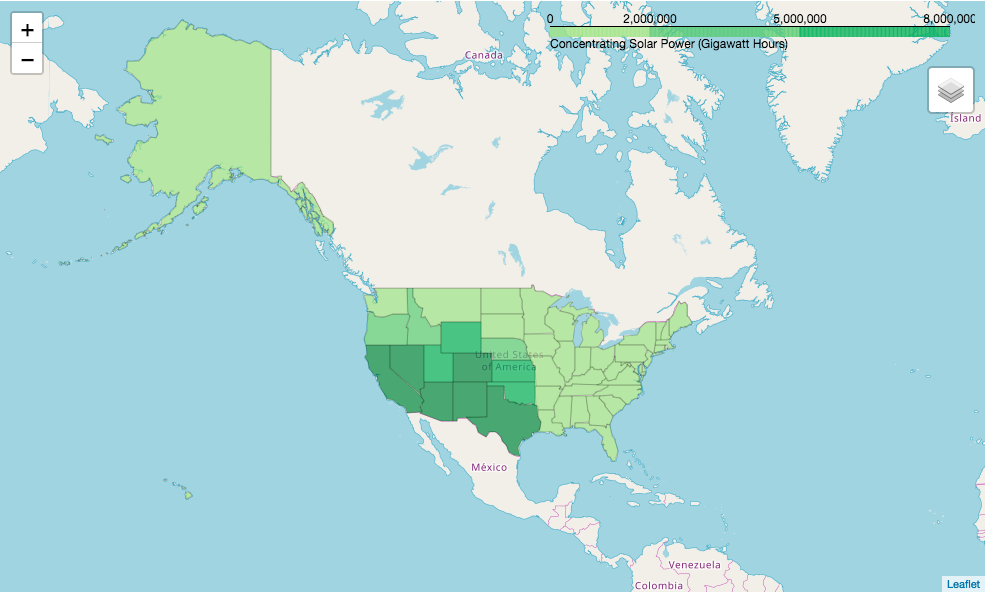

In [24]:
display(Image("choroplethMap/CSP.png", width=1000))

#### Table of estimated technical potential for Concentrating Solar Power by state:
Technical potential for CSP exists predominately in the Southwest.

In [25]:
CSP_DF.append(CSP_sumDF)

state    CSP_GWh  CSP_GW  CSP_km2
0                Alabama          0       0        0
1                 Alaska          0       0        0
2                Arizona   12544333    3527   107238
3               Arkansas          0       0        0
4             California    8490916    2725    82859
5               Colorado    9154524    3097    94173
6            Connecticut          0       0        0
7               Delaware          0       0        0
8   District of Columbia          0       0        0
9                Florida        358       0        3
10               Georgia          0       0        0
11                Hawaii      15369       5      168
12                 Idaho    3502877    1267    38523
13              Illinois          0       0        0
14               Indiana          0       0        0
15                  Iowa          0       0        0
16                Kansas    7974255    2884    87697
17              Kentucky          0       0        0
18             Louisiana          0       0        0
19                 Maine          0       0        0
20              Maryland          0       0        0
21         Massachusetts          0       0        0
22              Michigan          0       0        0
23             Minnesota          0       0        0
24           Mississippi          0       0        0
25              Missouri          0       0        0
26               Montana    1540287     557    16939
27              Nebraska    4846929    1753    53304
28                Nevada    8295752    2557    77759
29         New Hampshire          0       0        0
30            New Jersey          0       0        0
31            New Mexico   16812349    4860   147747
32              New York          0       0        0
33        North Carolina          0       0        0
34          North Dakota      36049      13      396
35                  Ohio          0       0        0
36              Oklahoma    5068036    1812    55113
37                Oregon    2812126    1017    30926
38          Pennsylvania          0       0        0
39          Rhode Island          0       0        0
40        South Carolina          0       0        0
41          South Dakota    1629659     589    17922
42             Tennessee          0       0        0
43                 Texas   22786749    7743   235398
44                  Utah    5067546    1638    49799
45               Vermont          0       0        0
46              Virginia          0       0        0
47            Washington     161713      58     1778
48         West Virginia          0       0        0
49             Wisconsin          0       0        0
50               Wyoming    5406407    1955    59457
0              U.S Total  116146234   38057  1157199

### 5. Onshore Wind Power
* Definition:  wind resource at 80 meters(m) height above surface that results in an annual average gross capacity factor of 30% (net capacity factor of 25.5%), using typical utility-scale wind turbine power curves. 
* We estimate annual generation by assuming a power density of 5 MW/km^2(DOE EERE 2008)10 and 15% energy losses to calculate net capacity factor.

In [26]:
onshoreWind_DF = inputDF[['state','onshoreWind_GWh','onshoreWind_GW','onshoreWind_km2']]
onshoreWind_sumDF = pd.DataFrame([['U.S Total',\
                                           onshoreWind_DF['onshoreWind_GWh'].sum(),\
                                           onshoreWind_DF['onshoreWind_GW'].sum(),\
                                           onshoreWind_DF['onshoreWind_km2'].sum()]], \
                                         columns=['state','onshoreWind_GWh','onshoreWind_GW','onshoreWind_km2'])

#### The total estimated annual technical potential in the United States for Onshore Wind Power：

In [27]:
onshoreWind_sumDF

state  onshoreWind_GWh  onshoreWind_GW  onshoreWind_km2
0  U.S Total         32783975           10937          2190929

#### Choropleth map of estimated technical potential for Onshore Wind Power in the U.S.:

In [28]:
threshold_scale = split_six(onshoreWind_DF['onshoreWind_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=onshoreWind_DF,
    columns=['state', 'onshoreWind_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Onshore Wind Power (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'onshoreWind.html'))

m

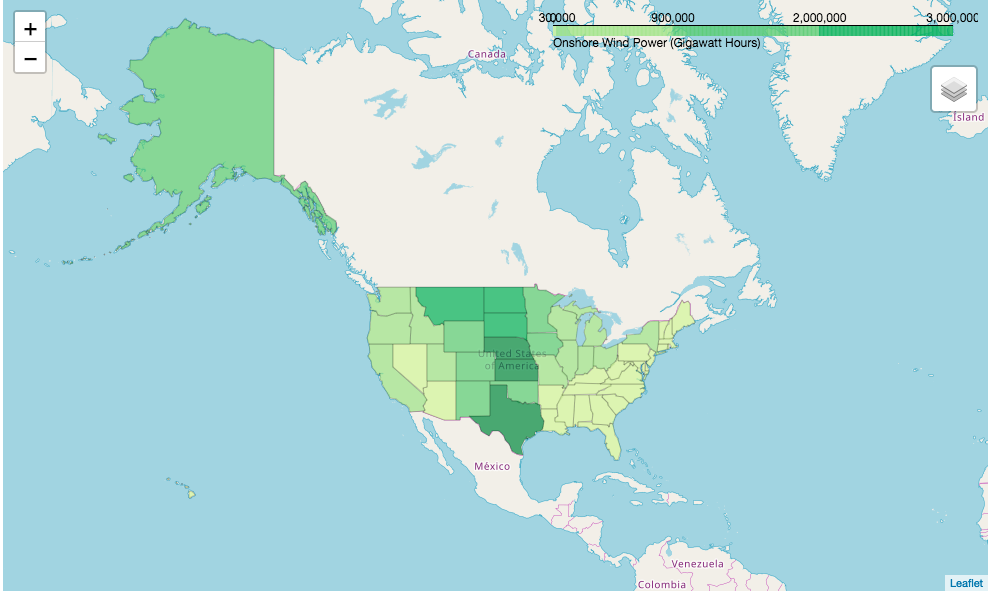

In [29]:
display(Image("choroplethMap/onshoreWind.png", width=1000))

#### Table of estimated technical potential for Onshore Wind Power by state:
Technical potential for onshore wind power is largest in the central Great Plains and lowest in the southeastern United States.  

In [30]:
onshoreWind_DF.append(onshoreWind_sumDF)

state  onshoreWind_GWh  onshoreWind_GW  onshoreWind_km2
0                Alabama              283               0               23
1                 Alaska          1373433             493            98669
2                Arizona            26036              10             2180
3               Arkansas            22892               9             1840
4             California            89862              34             6822
5               Colorado          1096035             387            77443
6            Connecticut               61               0                5
7               Delaware               21               0                1
8   District of Columbia                0               0                0
9                Florida                0               0                0
10               Georgia              322               0               26
11                Hawaii             7786               2              493
12                 Idaho            44319              18             3615
13              Illinois           649467             249            49976
14               Indiana           377603             148            29645
15                  Iowa          1723587             570           114142
16                Kansas          3101575             952           190474
17              Kentucky              147               0               12
18             Louisiana              934               0               81
19                 Maine            28742              11             2250
20              Maryland             3631               1              296
21         Massachusetts             2827               1              205
22              Michigan           143907              59            11808
23             Minnesota          1428524             489            97854
24           Mississippi                0               0                0
25              Missouri           689519             274            54871
26               Montana          2746271             944           188800
27              Nebraska          3011252             917           183599
28                Nevada            17709               7             1449
29         New Hampshire             5706               2              427
30            New Jersey              317               0               26
31            New Mexico          1399156             492            98416
32              New York            63565              25             5156
33        North Carolina             2037               0              161
34          North Dakota          2537824             770           154039
35                  Ohio           129142              54            10983
36              Oklahoma          1521651             516           103364
37                Oregon            68766              27             5420
38          Pennsylvania             8230               3              661
39          Rhode Island              129               0                9
40        South Carolina              427               0               37
41          South Dakota          2901858             882           176482
42             Tennessee              765               0               61
43                 Texas          5552399            1901           380305
44                  Utah            31552              13             2620
45               Vermont             7795               2              589
46              Virginia             4589               1              358
47            Washington            47249              18             3695
48         West Virginia             4951               1              376
49             Wisconsin           255266             103            20751
50               Wyoming          1653856             552           110414
0              U.S Total         32783975           10937          2190929

### 6. Offshore Wind Power
* Definition: annual average wind speed greater than or equal to 6.4 meters per second (m/s) at 90 m height above surface.
*  Our annual generation estimates assume a power density of 5 MW/km^2 and capacity factors based on wind speed interval and depth-based wind farm configurations to account for anchoring and stabilization for the turbines as
developed by NREL analysts for use in the ReEDS model (Musial and Ram 2010). 

In [31]:
offshoreWind_DF = inputDF[['state','offshoreWind_GWh','offshoreWind_GW','offshoreWind_km2']]
offshoreWind_sumDF = pd.DataFrame([['U.S Total',\
                                           offshoreWind_DF['offshoreWind_GWh'].sum(),\
                                           offshoreWind_DF['offshoreWind_GW'].sum(),\
                                           offshoreWind_DF['offshoreWind_km2'].sum()]], \
                                         columns=['state','offshoreWind_GWh','offshoreWind_GW','offshoreWind_km2'])

#### The total estimated annual technical potential in the United States for Offshore Wind Power：

In [32]:
offshoreWind_sumDF

state  offshoreWind_GWh  offshoreWind_GW  offshoreWind_km2
0  U.S Total        16975788.0           4210.0          844688.0

#### Choropleth map of estimated technical potential for Offshore Wind Power in the U.S.:

In [33]:
threshold_scale = split_six(offshoreWind_DF['offshoreWind_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=offshoreWind_DF,
    columns=['state', 'offshoreWind_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Offshore Wind Power  (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'offshoreWind.html'))


m

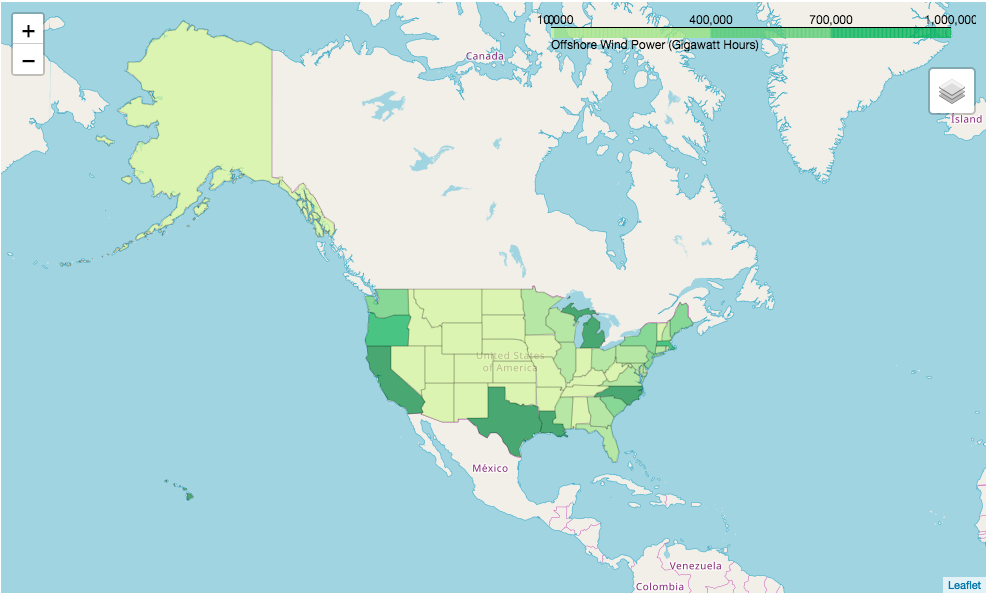

In [34]:
display(Image("choroplethMap/offshoreWind.png", width=1000))

#### Table of estimated technical potential for Offshore Wind Power by state:
Technical potential for offshore wind power is present in significant quantities in all offshore regions of the United States.

In [35]:
offshoreWind_DF.append(offshoreWind_sumDF)

state  offshoreWind_GWh  offshoreWind_GW  offshoreWind_km2
0                Alabama               0.0              0.0               0.0
1                 Alaska               0.0              0.0               0.0
2                Arizona               0.0              0.0               0.0
3               Arkansas               0.0              0.0               0.0
4             California         2662579.0            654.0          130966.0
5               Colorado               0.0              0.0               0.0
6            Connecticut           26545.0              7.0            1434.0
7               Delaware           60654.0             15.0            3007.0
8   District of Columbia               0.0              0.0               0.0
9                Florida           34684.0              9.0            1929.0
10               Georgia          220807.0             58.0           11725.0
11                Hawaii         2836735.0            736.0          147389.0
12                 Idaho               0.0              0.0               0.0
13              Illinois           66070.0             15.0            3174.0
14               Indiana             165.0              0.0               9.0
15                  Iowa               0.0              0.0               0.0
16                Kansas               0.0              0.0               0.0
17              Kentucky               0.0              0.0               0.0
18             Louisiana         1200698.0            340.0           68122.0
19                 Maine          631960.0            147.0           29483.0
20              Maryland          200852.0             51.0           10381.0
21         Massachusetts          799344.0            184.0           36815.0
22              Michigan         1739800.0            422.0           84515.0
23             Minnesota          100454.0             29.0            5842.0
24           Mississippi           10172.0              3.0             642.0
25              Missouri               0.0              0.0               0.0
26               Montana               0.0              0.0               0.0
27              Nebraska               0.0              0.0               0.0
28                Nevada               0.0              0.0               0.0
29         New Hampshire           14477.0              3.0             691.0
30            New Jersey          429807.0            101.0           20386.0
31            New Mexico               0.0              0.0               0.0
32              New York          614279.0            146.0           29215.0
33        North Carolina         1269626.0            306.0           61204.0
34          North Dakota               0.0              0.0               0.0
35                  Ohio          170561.0             41.0            8360.0
36              Oklahoma               0.0              0.0               0.0
37                Oregon          962722.0            225.0           45001.0
38          Pennsylvania           23571.0              5.0            1134.0
39          Rhode Island           89114.0             20.0            4193.0
40        South Carolina          542218.0            133.0           26643.0
41          South Dakota               0.0              0.0               0.0
42             Tennessee               0.0              0.0               0.0
43                 Texas         1101062.0            271.0           54288.0
44                  Utah               0.0              0.0               0.0
45               Vermont               0.0              0.0               0.0
46              Virginia          361053.0             89.0           17814.0
47            Washington          488025.0            120.0           24192.0
48         West Virginia               0.0              0.0               0.0
49             Wisconsin          317754.0             80.0           16134.0
50               Wyoming               0.

### 7. Biopower (Solid and Gaseous)
* Definition: We obtained county-level estimates of solid biomass resource for crop, forest, primary/secondary mill residues, and urban wood waste from Milbrandt (2005, updated in 2008) who reported the estimates in bone-dry tonnes (BDT) per year. 


#### 7.a. Biopower of Solid 
*  We calculate technical potential energy generation assuming 1.1 MWh/BDT, which represents an average solid biomass system output with an industry-average conversion efficiency of 20%, and a higher heating value (HHV) of 8,500 BTU/lb.

In [36]:
biopowerSolid_DF = inputDF[['state','biopowerSolid_GWh','biopowerSolid_GW','biopowerSolid_BDT']]
biopowerSolid_sumDF = pd.DataFrame([['U.S Total',\
                                           biopowerSolid_DF['biopowerSolid_GWh'].sum(),\
                                           biopowerSolid_DF['biopowerSolid_GW'].sum(),\
                                           biopowerSolid_DF['biopowerSolid_BDT'].sum()]], \
                                         columns=['state','biopowerSolid_GWh','biopowerSolid_GW','biopowerSolid_BDT'])

#### The total estimated annual technical potential in the United States for Biopower of Solid ：

In [37]:
biopowerSolid_sumDF

state  biopowerSolid_GWh  biopowerSolid_GW  biopowerSolid_BDT
0  U.S Total             399750                30          363430992

#### Choropleth map of estimated technical potential for Biopower of Solid  in the U.S.:

In [38]:
threshold_scale = split_six(biopowerSolid_DF['biopowerSolid_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=biopowerSolid_DF,
    columns=['state', 'biopowerSolid_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Biopower of Solid (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'biopowerSolid.html'))


m

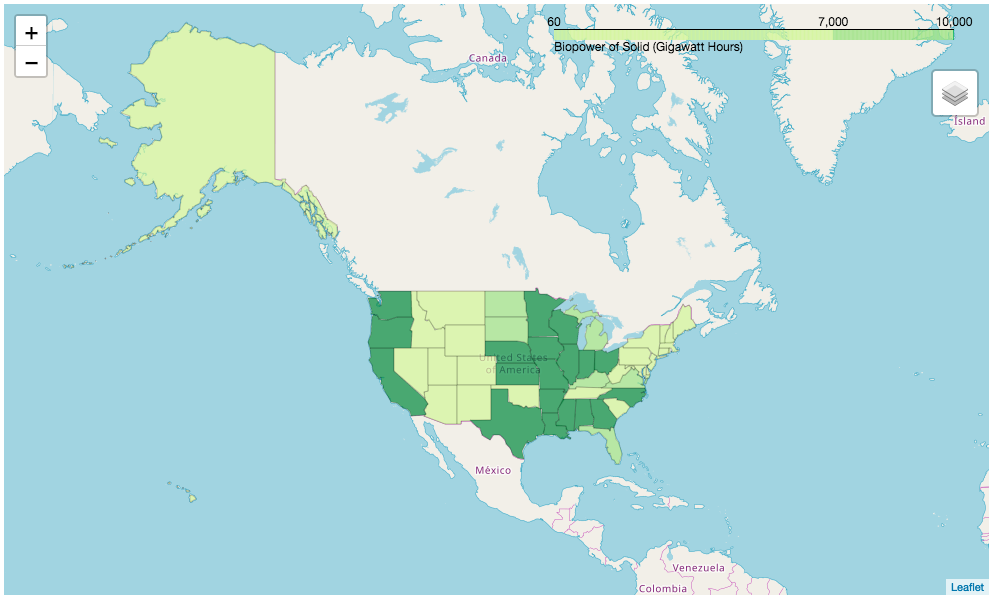

In [39]:
display(Image("choroplethMap/biopowerSolid.png", width=1000))

#### Table of estimated technical potential for Biopower of Solid  by state:

In [40]:
biopowerSolid_DF.append(biopowerSolid_sumDF)

state  biopowerSolid_GWh  biopowerSolid_GW  \
0                Alabama              11193                 1   
1                 Alaska                513                 0   
2                Arizona               1087                 0   
3               Arkansas              14381                 1   
4             California              12408                 1   
5               Colorado               2913                 0   
6            Connecticut                494                 0   
7               Delaware                512                 0   
8   District of Columbia                 61                 0   
9                Florida               9664                 1   
10               Georgia              14682                 1   
11                Hawaii                524                 0   
12                 Idaho               5775                 0   
13              Illinois              27738                 3   
14               Indiana              14941                 1   
15                  Iowa              27502                 3   
16                Kansas              12104                 1   
17              Kentucky               7048                 0   
18             Louisiana              14016                 1   
19                 Maine               4273                 0   
20              Maryland               2102                 0   
21         Massachusetts               1045                 0   
22              Michigan               9358                 1   
23             Minnesota              20361                 2   
24           Mississippi              14209                 1   
25              Missouri              11837                 1   
26               Montana               4924                 0   
27              Nebraska              16271                 2   
28                Nevada                288                 0   
29         New Hampshire                953                 0   
30            New Jersey               1212                 0   
31            New Mexico                595                 0   
32              New York               5558                 0   
33        North Carolina              12869                 1   
34          North Dakota               8186                 1   
35                  Ohio              11009                 1   
36              Oklahoma               4128                 0   
37                Oregon              13793                 1   
38          Pennsylvania               6313                 0   
39          Rhode Island                143                 0   
40        South Carolina               6984                 0   
41          South Dakota               8380                 1   
42             Tennessee               6095                 0   
43                 Texas              16077                 2   
44                  Utah                433                 0   
45               Vermont                491                 0   
46              Virginia               7866                 0   
47            Washington              12311                 1   
48         West Virginia               2406                 0   
49             Wisconsin              11221                 1   
50               Wyoming                503                 0   
0              U.S Total             399750                30   

    biopowerSolid_BDT  
0            10175869  
1              466797  
2              988705  
3            13074040  
4            11280245  
5             2648462  
6              449775  
7              465802  
8               56180  
9             8785824  
10           13347586  
11             476459  
12            5250560  
13           25216443  
14           13583318  
15           25002253  
16           11004052  
17            6407337  
18           12741856  
19            3884583  
20            1911045  
21             950308  
22            8507307

#### 7.b. Biopower of Gaseous
*  We obtained county-level estimates of gaseous biomass (methane emissions), from animal manure, domestic wastewater treatment plants, and landfills; all estimates were reported in tonnes of methane (CH4) per year.

In [41]:
biopowerGaseous_DF = inputDF[['state','biopowerGaseous_GWh','biopowerGaseous_GW','biopowerGaseous_Tonnes-CH4']]
biopowerGaseous_sumDF = pd.DataFrame([['U.S Total',\
                                           biopowerGaseous_DF['biopowerGaseous_GWh'].sum(),\
                                           biopowerGaseous_DF['biopowerGaseous_GW'].sum(),\
                                           biopowerGaseous_DF['biopowerGaseous_Tonnes-CH4'].sum()]], \
                                         columns=['state','biopowerGaseous_GWh','biopowerGaseous_GW','biopowerGaseous_Tonnes-CH4'])

#### The total estimated annual technical potential in the United States for Biopower of Gaseous：

In [42]:
biopowerGaseous_sumDF

state  biopowerGaseous_GWh  biopowerGaseous_GW  \
0  U.S Total                88528                   1   

   biopowerGaseous_Tonnes-CH4  
0                    18840706

#### Choropleth map of estimated technical potential for Biopower of Gaseous in the U.S.:

In [43]:
threshold_scale = split_six(biopowerGaseous_DF['biopowerGaseous_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=biopowerGaseous_DF,
    columns=['state', 'biopowerGaseous_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Biopower of Gaseous (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'biopowerGaseous.html'))

m

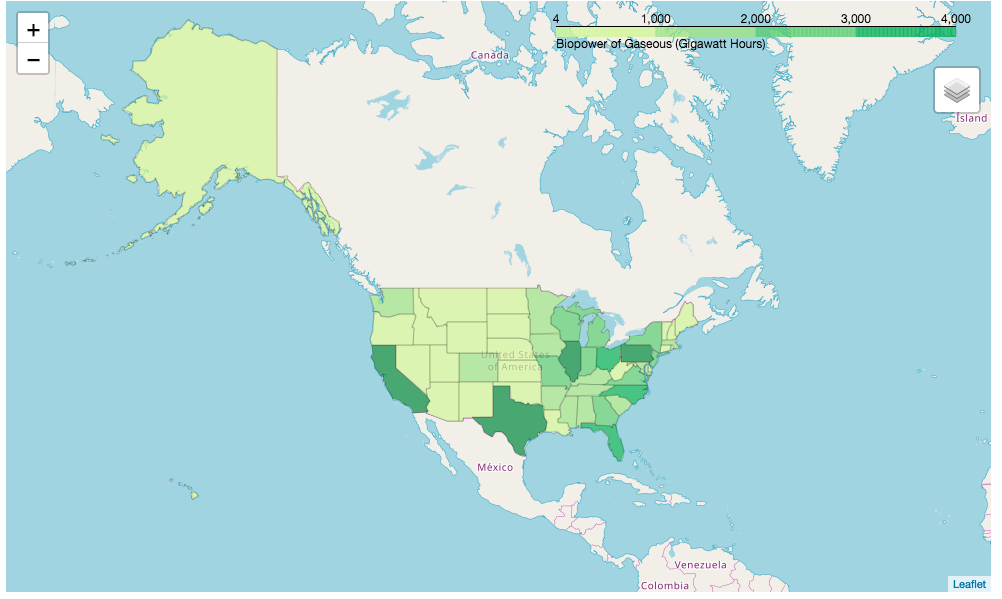

In [44]:
display(Image("choroplethMap/biopowerGaseous.png", width=1000))

#### Table of estimated technical potential for Biopower of Gaseous by state:

In [45]:
biopowerGaseous_DF.append(biopowerGaseous_sumDF)

state  biopowerGaseous_GWh  biopowerGaseous_GW  \
0                Alabama                 1533                   0   
1                 Alaska                   61                   0   
2                Arizona                  837                   0   
3               Arkansas                 1063                   0   
4             California                15510                   1   
5               Colorado                 1224                   0   
6            Connecticut                  414                   0   
7               Delaware                  385                   0   
8   District of Columbia                    4                   0   
9                Florida                 3693                   0   
10               Georgia                 2220                   0   
11                Hawaii                  200                   0   
12                 Idaho                  182                   0   
13              Illinois                 4222                   0   
14               Indiana                 2978                   0   
15                  Iowa                 1425                   0   
16                Kansas                  753                   0   
17              Kentucky                 1273                   0   
18             Louisiana                  857                   0   
19                 Maine                  124                   0   
20              Maryland                 1226                   0   
21         Massachusetts                 1103                   0   
22              Michigan                 2539                   0   
23             Minnesota                 1029                   0   
24           Mississippi                 1076                   0   
25              Missouri                 2147                   0   
26               Montana                  147                   0   
27              Nebraska                  750                   0   
28                Nevada                  325                   0   
29         New Hampshire                  389                   0   
30            New Jersey                 2310                   0   
31            New Mexico                  353                   0   
32              New York                 2950                   0   
33        North Carolina                 3780                   0   
34          North Dakota                   30                   0   
35                  Ohio                 3363                   0   
36              Oklahoma                  965                   0   
37                Oregon                  890                   0   
38          Pennsylvania                 7132                   0   
39          Rhode Island                  474                   0   
40        South Carolina                 1430                   0   
41          South Dakota                  235                   0   
42             Tennessee                 1984                   0   
43                 Texas                 5898                   0   
44                  Utah                  427                   0   
45               Vermont                  203                   0   
46              Virginia                 2498                   0   
47            Washington                 1514                   0   
48         West Virginia                  281                   0   
49             Wisconsin                 2072                   0   
50               Wyoming                   50                   0   
0              U.S Total                88528                   1   

    biopowerGaseous_Tonnes-CH4  
0                       326186  
1                        13156  
2                       178188  
3                       226178  
4                      3300211  
5                       260470  
6                        88227  
7                        82013  
8                          977  
9                       785787 

### 8. Hydrothermal Power Systems (Geothermal Energy Technologies)
* Definition:  For identified hydrothermal and undiscovered hydrothermal, we used estimates from Williams et al. (2008), who estimated electric power generation potential of conventional geothermal resources (hydrothermal), both identified and unidentified in the western United States, Alaska, and Hawaii.
*  In all cases, exclusions included public lands, such as national parks, that are not available for resource development. 

In [46]:
geothermalHydrothermal_DF = inputDF[['state','geothermalHydrothermal_GWh','geothermalHydrothermal_GW']]
geothermalHydrothermal_sumDF = pd.DataFrame([['U.S Total',\
                                           geothermalHydrothermal_DF['geothermalHydrothermal_GWh'].sum(),\
                                           geothermalHydrothermal_DF['geothermalHydrothermal_GW'].sum()]], \
                                         columns=['state','geothermalHydrothermal_GWh','geothermalHydrothermal_GW'])

#### The total estimated annual technical potential in the United States for Hydrothermal Power Systems：

In [47]:
geothermalHydrothermal_sumDF

state  geothermalHydrothermal_GWh  geothermalHydrothermal_GW
0  U.S Total                      301376                         32

#### Choropleth map of estimated technical potential for Hydrothermal Power Systems in the U.S.:

In [48]:
threshold_scale = split_six(geothermalHydrothermal_DF['geothermalHydrothermal_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=geothermalHydrothermal_DF,
    columns=['state', 'geothermalHydrothermal_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Hydrothermal Power Systems (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'geothermalHydrothermal.html'))


m

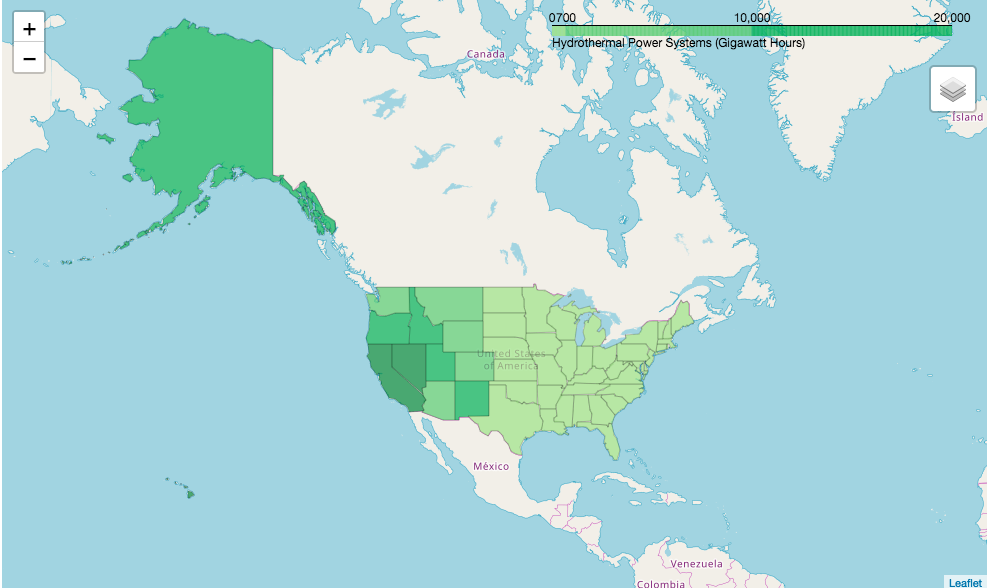

In [49]:
display(Image("choroplethMap/geothermalHydrothermal.png", width=1000))

#### Table of estimated technical potential for Hydrothermal Power Systems by state:

In [50]:
geothermalHydrothermal_DF.append(geothermalHydrothermal_sumDF)

state  geothermalHydrothermal_GWh  \
0                Alabama                           0   
1                 Alaska                       15437   
2                Arizona                        8329   
3               Arkansas                           0   
4             California                      130921   
5               Colorado                        8953   
6            Connecticut                           0   
7               Delaware                           0   
8   District of Columbia                           0   
9                Florida                           0   
10               Georgia                           0   
11                Hawaii                       20632   
12                 Idaho                       17205   
13              Illinois                           0   
14               Indiana                           0   
15                  Iowa                           0   
16                Kansas                           0   
17              Kentucky                           0   
18             Louisiana                           0   
19                 Maine                           0   
20              Maryland                           0   
21         Massachusetts                           0   
22              Michigan                           0   
23             Minnesota                           0   
24           Mississippi                           0   
25              Missouri                           0   
26               Montana                        6547   
27              Nebraska                           0   
28                Nevada                       45320   
29         New Hampshire                           0   
30            New Jersey                           0   
31            New Mexico                       12933   
32              New York                           0   
33        North Carolina                           0   
34          North Dakota                           0   
35                  Ohio                           0   
36              Oklahoma                           0   
37                Oregon                       18199   
38          Pennsylvania                           0   
39          Rhode Island                           0   
40        South Carolina                           0   
41          South Dakota                           0   
42             Tennessee                           0   
43                 Texas                           0   
44                  Utah                       12981   
45               Vermont                           0   
46              Virginia                           0   
47            Washington                        2546   
48         West Virginia                           0   
49             Wisconsin                           0   
50               Wyoming                        1373   
0              U.S Total                      301376   

    geothermalHydrothermal_GW  
0                           0  
1                           1  
2                           1  
3                           0  
4                          16  
5                           1  
6                           0  
7                           0  
8                           0  
9                           0  
10                          0  
11                          2  
12                          2  
13                          0  
14                          0  
15                          0  
16                          0  
17                          0  
18                          0  
19                          0  
20                          0  
21                          0  
22                          0  
23                          0  
24                          0  
25                          0  
26                          0  
27                          0  
28                          5  
29                          0  
30                          0  
31                        

### 9. Enhanced Geothermal Systems
* Definition: We derive technical potential estimates for enhanced geothermal systems (EGS) from temperature at depth data obtained from the Southern Methodist University’s (SMU) Geothermal Laboratory
* Electric generation potential calculations summarize the technical potential (MW) at all depth intervals, electric generation potential (GWh) at all depth intervals with a 90% capacity factor, and annual electric generation potential (GWh) only at optimum depth. 

In [51]:
EGSGeothermal_DF = inputDF[['state','EGSGeothermal_GWh','EGSGeothermal_GW']]
EGSGeothermal_sumDF = pd.DataFrame([['U.S Total',\
                                           EGSGeothermal_DF['EGSGeothermal_GWh'].sum(),\
                                           EGSGeothermal_DF['EGSGeothermal_GW'].sum()]], \
                                         columns=['state','EGSGeothermal_GWh','EGSGeothermal_GW'])

#### The total estimated annual technical potential in the United States for Enhanced Geothermal Systems：

In [52]:
EGSGeothermal_sumDF

state  EGSGeothermal_GWh  EGSGeothermal_GW
0  U.S Total         31344671.0            3948.0

#### Choropleth map of estimated technical potential for Enhanced Geothermal Systems in the U.S.:

In [53]:
threshold_scale = split_six(EGSGeothermal_DF['EGSGeothermal_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=EGSGeothermal_DF,
    columns=['state', 'EGSGeothermal_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Enhanced Geothermal Systems (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'EGSGeothermal.html'))


m

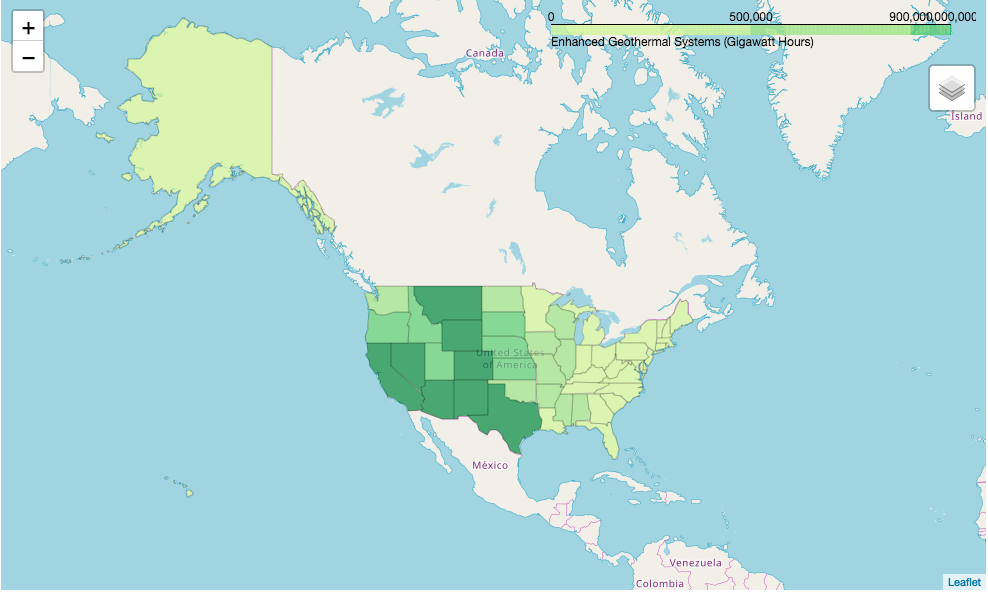

In [54]:
display(Image("choroplethMap/EGSGeothermal.png", width=1000))

#### Table of estimated technical potential for Enhanced Geothermal Systems by state:
The vast majority of the geothermal potential for EGS(31,344 TWh) within the contiguous United States is located in the westernmost portion of the country. 

In [55]:
EGSGeothermal_DF.append(EGSGeothermal_sumDF)

state  EGSGeothermal_GWh  EGSGeothermal_GW
0                Alabama           535489.0              67.0
1                 Alaska                0.0               0.0
2                Arizona          1239147.0             157.0
3               Arkansas           628621.0              79.0
4             California          1344179.0             170.0
5               Colorado          1251657.0             158.0
6            Connecticut            56078.0               7.0
7               Delaware            22813.0               2.0
8   District of Columbia              697.0               0.0
9                Florida           374161.0              47.0
10               Georgia           353206.0              44.0
11                Hawaii                0.0               0.0
12                 Idaho           993257.0             125.0
13              Illinois           676055.0              85.0
14               Indiana           434258.0              55.0
15                  Iowa           606390.0              76.0
16                Kansas           989675.0             125.0
17              Kentucky           484658.0              61.0
18             Louisiana           484271.0              61.0
19                 Maine           377075.0              47.0
20              Maryland            86649.0              10.0
21         Massachusetts            92227.0              11.0
22              Michigan           457850.0              58.0
23             Minnesota           369784.0              46.0
24           Mississippi           559056.0              70.0
25              Missouri           835444.0             105.0
26               Montana          1647303.0             208.0
27              Nebraska           927996.0             117.0
28                Nevada          1262174.0             160.0
29         New Hampshire           104314.0              13.0
30            New Jersey            35230.0               4.0
31            New Mexico          1417978.0             179.0
32              New York           375400.0              47.0
33        North Carolina           420741.0              53.0
34          North Dakota           820226.0             104.0
35                  Ohio           495921.0              62.0
36              Oklahoma           779667.0              98.0
37                Oregon           914105.0             115.0
38          Pennsylvania           327340.0              41.0
39          Rhode Island            11491.0               1.0
40        South Carolina           364104.0              46.0
41          South Dakota           921972.0             116.0
42             Tennessee           428380.0              54.0
43                 Texas          3030250.0             384.0
44                  Utah           939380.0             119.0
45               Vermont            35616.0               4.0
46              Virginia           290736.0              36.0
47            Washington           563023.0              71.0
48         West Virginia           261376.0              33.0
49             Wisconsin           647173.0              82.0
50               Wyoming          1070078.0             135.0
0              U.S Total         31344671.0            3948.0

### 10. Hydropower 
* Definition: Source point locations of hydropower estimates were provided by the Idaho National Laboratory and were taken from Hall et al. (2006).  
* The feasibility study included additional economic potential criteria such as site accessibility, load or transmission proximity, along with technical potential exclusions of land use or environmental sensitivity. 

In [56]:
hydropower_DF = inputDF[['state','hydropower_GWh','hydropower_GW','hydropower_countOfSites']]
hydropower_sumDF = pd.DataFrame([['U.S Total',\
                                           hydropower_DF['hydropower_GWh'].sum(),\
                                           hydropower_DF['hydropower_GW'].sum(),\
                                           hydropower_DF['hydropower_countOfSites'].sum()]], \
                                         columns=['state','hydropower_GWh','hydropower_GW','hydropower_countOfSites'])

#### The total estimated annual technical potential in the United States for Hydropower ：

In [57]:
hydropower_sumDF

state  hydropower_GWh  hydropower_GW  hydropower_countOfSites
0  U.S Total          258929             38                   128126

#### Choropleth map of estimated technical potential for Hydropower in the U.S.:

In [58]:
threshold_scale = split_six(hydropower_DF['hydropower_GWh'])

m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=hydropower_DF,
    columns=['state', 'hydropower_GWh'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=' Hydropower (Gigawatt Hours)',
    threshold_scale=threshold_scale,
    reset=True
)


folium.LayerControl().add_to(m)
m.save(os.path.join('choroplethMap', 'hydropower.html'))

m

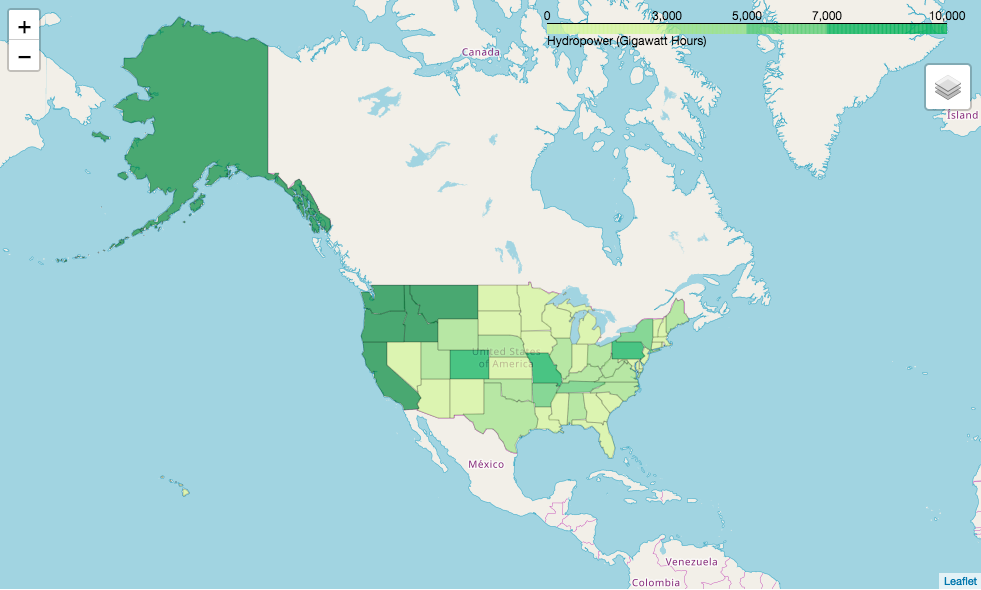

In [59]:
display(Image("choroplethMap/hydropower.png", width=1000))

#### Table of estimated technical potential for Enhanced Geothermal Systems by state:
Technical potential for hydropower exists predominately in the Northwest and Alaska.

In [60]:
hydropower_DF.append(hydropower_sumDF)

state  hydropower_GWh  hydropower_GW  \
0                Alabama            4102              0   
1                 Alaska           23675              5   
2                Arizona            1303              0   
3               Arkansas            6093              1   
4             California           30023              6   
5               Colorado            7789              1   
6            Connecticut             922              0   
7               Delaware              30              0   
8   District of Columbia               0              0   
9                Florida             682              0   
10               Georgia            1988              0   
11                Hawaii            2602              0   
12                 Idaho           18757              4   
13              Illinois            4882              1   
14               Indiana            2394              0   
15                  Iowa            2818              0   
16                Kansas            2507              0   
17              Kentucky            4255              0   
18             Louisiana            2423              0   
19                 Maine            3916              0   
20              Maryland             814              0   
21         Massachusetts            1196              0   
22              Michigan            1180              0   
23             Minnesota            1254              0   
24           Mississippi            2211              0   
25              Missouri            7198              1   
26               Montana           14546              3   
27              Nebraska            3142              0   
28                Nevada             845              0   
29         New Hampshire            1740              0   
30            New Jersey             549              0   
31            New Mexico            1362              0   
32              New York            6711              1   
33        North Carolina            3036              0   
34          North Dakota             347              0   
35                  Ohio            3045              0   
36              Oklahoma            3015              0   
37                Oregon           18184              4   
38          Pennsylvania            8368              1   
39          Rhode Island              59              0   
40        South Carolina            1888              0   
41          South Dakota            1047              0   
42             Tennessee            5744              1   
43                 Texas            3006              0   
44                  Utah            3528              0   
45               Vermont            1710              0   
46              Virginia            3656              0   
47            Washington           27248              6   
48         West Virginia            4408              1   
49             Wisconsin            2286              1   
50               Wyoming            4445              1   
0              U.S Total          258929             38   

    hydropower_countOfSites  
0                      2435  
1                      3053  
2                      1958  
3                      3268  
4                      9692  
5                      5060  
6                       659  
7                        25  
8                         2  
9                       493  
10                     2100  
11                      437  
12                     6706  
13                     1330  
14                     1142  
15                     2398  
16                     3201  
17                     1394  
18                      934  
19                     1373  
20                      491  
21                      560  
22                     1942  
23                     1391  
24                     1536  
25                     5089  
26                     6859  
27                     2880  
28                   

## Visualizing distribution of renewable energy in each state

In [61]:
state = []
energy_list = []
for idx, row in inputDF.iterrows():
    state.append(row.state)
    energy_dist = {}
    energy_dist['urbanUtilityScalePV'] = row['urbanUtilityScalePV_GWh']
    energy_dist['ruralUtilityScalePV'] = row['ruralUtilityScalePV_GWh']
    energy_dist['rooftopPV'] = row['rooftopPV_GWh']
    energy_dist['CSP'] = row['CSP_GWh']
    energy_dist['onshoreWind'] = row['onshoreWind_GWh']
    energy_dist['offshoreWind'] = row['offshoreWind_GWh']
    energy_dist['biopowerSolid'] = row['biopowerSolid_GWh']
    energy_dist['biopowerGaseous'] = row['biopowerGaseous_GWh']
    energy_dist['geothermalHydrothermal'] = row['geothermalHydrothermal_GWh']
    energy_dist['EGSGeothermal'] = row['EGSGeothermal_GWh']
    energy_dist['hydropower'] = row['hydropower_GWh']
    energy_list.append(energy_dist)

In [62]:
energy_df = pd.DataFrame.from_dict(energy_list[0], orient='index').sort_values(by=0)
for i in range(1,len(state)):
    energy_df_tmp = pd.DataFrame.from_dict(energy_list[i], orient='index').sort_values(by=0)
    energy_df = pd.concat([energy_df, energy_df_tmp], axis=1)
energy_df.columns = state
                

In [63]:
energy_df

Alabama     Alaska     Arizona   Arkansas  \
CSP                           0.0        0.0  12544333.0        0.0   
EGSGeothermal            535489.0        0.0   1239147.0   628621.0   
biopowerGaseous            1533.0       61.0       837.0     1063.0   
biopowerSolid             11193.0      513.0      1087.0    14381.0   
geothermalHydrothermal        0.0    15437.0      8329.0        0.0   
hydropower                 4102.0    23675.0      1303.0     6093.0   
offshoreWind                  0.0        0.0         0.0        0.0   
onshoreWind                 283.0  1373433.0     26036.0    22892.0   
rooftopPV                 15475.0        0.0     22736.0     8484.0   
ruralUtilityScalePV     3706838.0  8282976.0  11867693.0  4986388.0   
urbanUtilityScalePV       35850.0      166.0    121305.0    28960.0   

                        California    Colorado  Connecticut  Delaware  \
CSP                      8490916.0   9154524.0          0.0       0.0   
EGSGeothermal            1344179.0   1251657.0      56078.0   22813.0   
biopowerGaseous            15510.0      1224.0        414.0     385.0   
biopowerSolid              12408.0      2913.0        494.0     512.0   
geothermalHydrothermal    130921.0      8953.0          0.0       0.0   
hydropower                 30023.0      7789.0        922.0      30.0   
offshoreWind             2662579.0         0.0      26545.0   60654.0   
onshoreWind                89862.0   1096035.0         61.0      21.0   
rooftopPV                 106411.0     16162.0       6616.0    2185.0   
ruralUtilityScalePV      8855917.0  10238083.0      19627.0  272332.0   
urbanUtilityScalePV       246008.0     43470.0       7716.0   14856.0   

                        District of Columbia    Florida    ...      \
CSP                                      0.0      358.0    ...       
EGSGeothermal                          697.0   374161.0    ...       
biopowerGaseous                          4.0     3693.0    ...       
biopowerSolid                           61.0     9664.0    ...       
geothermalHydrothermal                   0.0        0.0    ...       
hydropower                               0.0      682.0    ...       
offshoreWind                             0.0    34684.0    ...       
onshoreWind                              0.0        0.0    ...       
rooftopPV                             2490.0    63986.0    ...       
ruralUtilityScalePV                      0.0  5137346.0    ...       
urbanUtilityScalePV                      8.0    72787.0    ...       

                        South Dakota  Tennessee       Texas       Utah  \
CSP                        1629659.0        0.0  22786749.0  5067546.0   
EGSGeothermal               921972.0   428380.0   3030250.0   939380.0   
biopowerGaseous                235.0     1984.0      5898.0      427.0   
biopowerSolid                 8380.0     6095.0     16077.0      433.0   
geothermalHydrothermal           0.0        0.0         0.0    12981.0   
hydropower                    1047.0     5744.0      3006.0     3528.0   
offshoreWind                     0.0        0.0   1101062.0        0.0   
onshoreWind                2901858.0      765.0   5552399.0    31552.0   
rooftopPV                     2082.0    19685.0     78716.0     7513.0   
ruralUtilityScalePV       10008873.0  2225989.0  38993581.0  5184878.0   
urbanUtilityScalePV           4573.0    50243.0    294684.0    30492.0   

                        Vermont   Virginia  Washington  West Virginia  \
CSP                         0.0        0.0    161713.0            0.0   
EGSGeothermal           35616.0   290736.0    563023.0       261376.0   
biopowerGaseous           203.0     2498.0      1514.0          281.0   
biopowerSolid             491.0     7866.0     12311.0         2406.0   
geothermalHydrothermal      0.0        0.0      2546.0            0.0   
hydropower               1710.0     3656.0     27248.0         4408.0   
offshoreWind                0.0   361053.0    488025.0 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112644e48>,
      dtype=object)

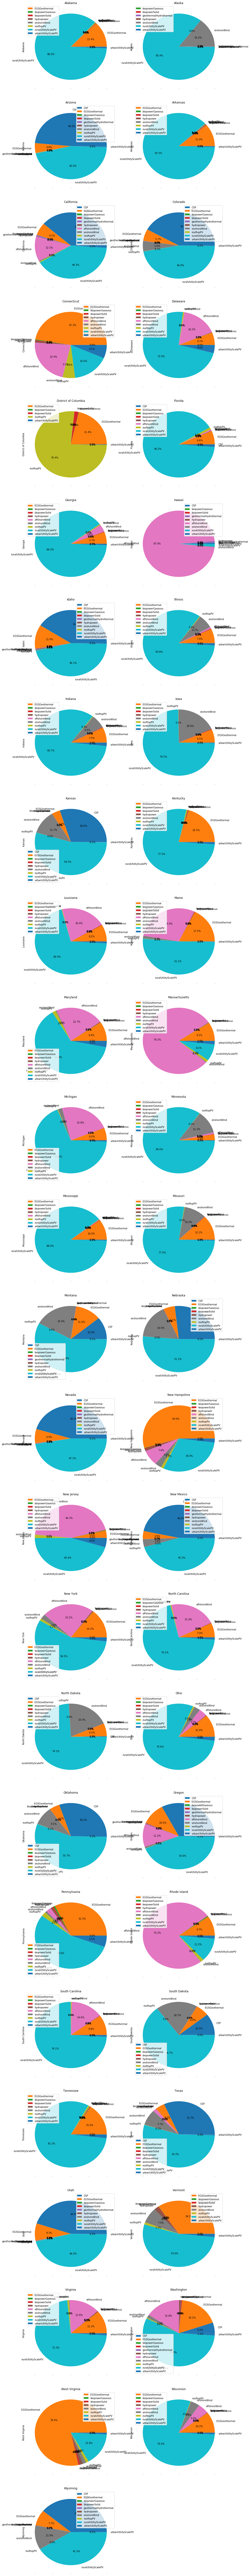

In [64]:
energy_df.plot.pie(
                 figsize=(15,200), 
                 fontsize = 10, autopct='%1.1f%%',
                 legend = True,
                 subplots=True,
                 layout=(26, 2),
                 title = state)

## Plotting the technical potential based on state

Text(0,0.5,'Total Renewable Energy Technical Potential')

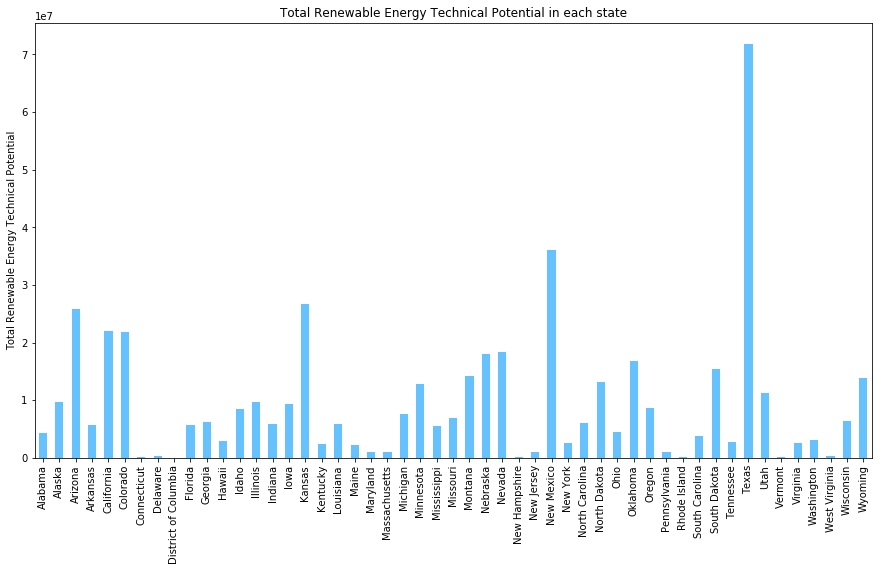

In [65]:
energy_df.sum().plot(kind='bar', 
           x='state',
           y='Total Renewable Energy Technical Potential',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Total Renewable Energy Technical Potential in each state', 
           legend = False)
plt.ylabel('state')
plt.ylabel('Total Renewable Energy Technical Potential')

### Conclusion
* Texas has the highest estimated technical potential.
* Rural Utility-Scale Photovoltaics is the predominant generation in most states.
* Connecticut, New Hampshire and West Virginia mainly depend on Enhanced Geothermal Systems.
* Hawaii, Massachusetts and Rhode Island mainly depend on Offshore Wind Power, as the result of geographic location
